In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import math

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
print('Libraries imported successfully!')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Libraries imported successfully!


In [35]:
atom_dict = {"00":"H", "01":"C", "10":"O", "11":"N"}

pi = math.pi
shots = 1024

num_of_atom_bits = 2
num_of_coord_bits = 5
num_of_total_bits = num_of_atom_bits+3*num_of_coord_bits

In [36]:
def binaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal  

def whichAtom(atom, num_of_qubits, dictionary):
    return dictionary[atom]

def calcDistance(coord_dist, num_of_qubits):
    distance = binaryToDecimal(coord_dist)/(2**(num_of_qubits-2))
    return distance

def experiment(shots):
    backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
    job = execute(atom_qc,backend, shots = shots) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
    result = job.result()

    counts = result.get_counts()
    return counts

<b>Constructing the Quantum Circuit</b> (will come from the Quantum Generator)

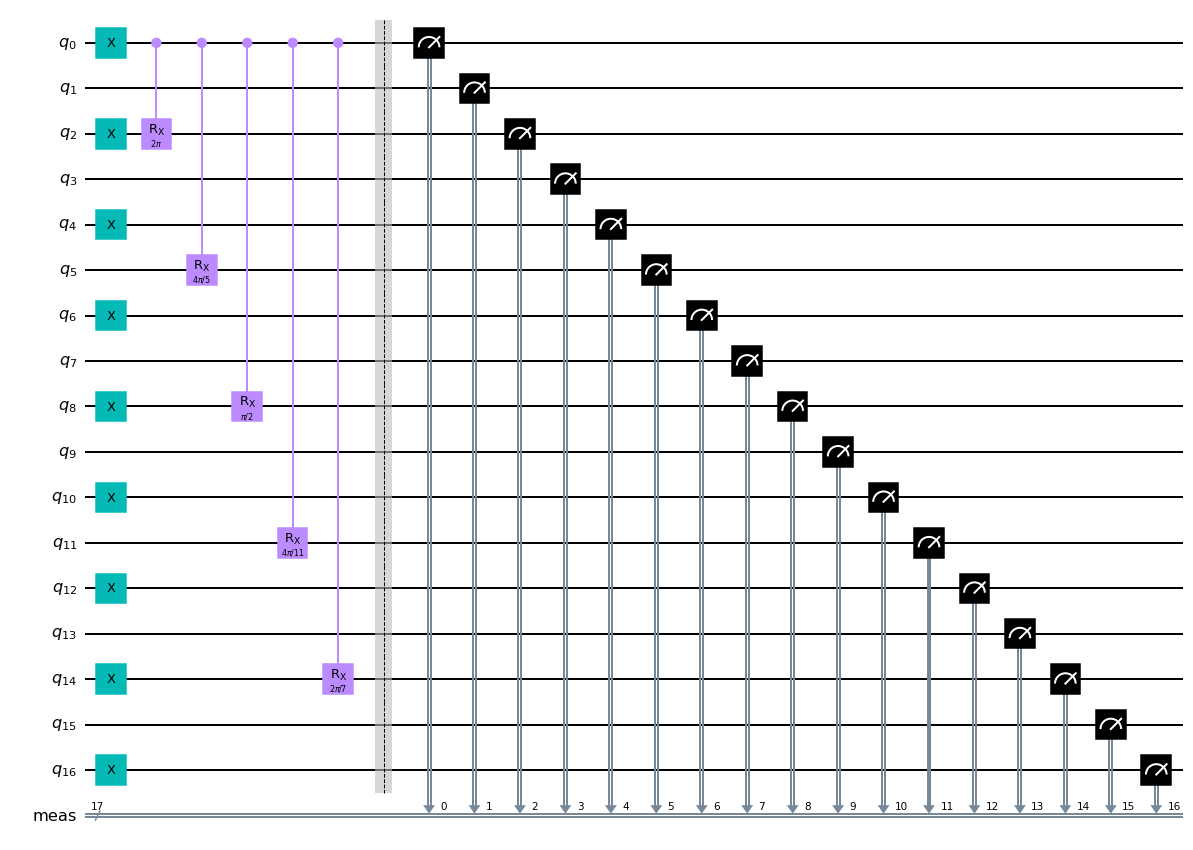

In [40]:
atom_qc = QuantumCircuit(num_of_total_bits)
#atom_qc.h([i for i in range(0,num_of_total_bits,4)])
atom_qc.x([i for i in range(0,num_of_total_bits,2)])
#atom_qc.x([1,2,3])
for q_idx in range(num_of_atom_bits,num_of_total_bits,3):
    atom_qc.crx(4*pi/q_idx, 0, q_idx)
    #atom_qc.crx(3*pi/4, 1, q_idx)
atom_qc.measure_all()
atom_qc.draw()

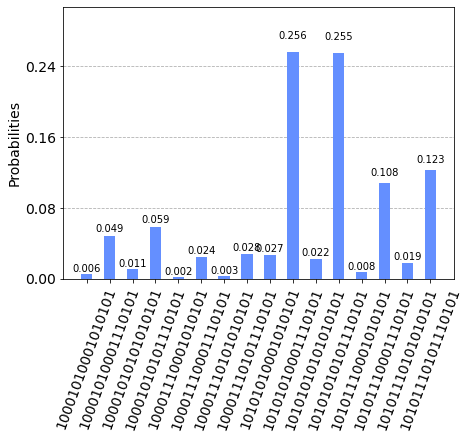

In [41]:
counts = experiment(shots)
plot_histogram(counts)

In [42]:
maxVal = -1
for value in counts.values():
    if value > maxVal:
        maxVal = value
maxKey = list(counts.keys())[list(counts.values()).index(maxVal)][::-1]
#print(maxKey)

atom_bit_str = maxKey[:num_of_atom_bits]
#print(atom,"\n")

x_coord = int(maxKey[num_of_atom_bits:num_of_atom_bits+num_of_coord_bits])
#print(x_coord)

y_coord = int(maxKey[num_of_atom_bits+num_of_coord_bits:num_of_atom_bits+2*num_of_coord_bits])
#print(x_coord)

z_coord = int(maxKey[num_of_atom_bits+2*num_of_coord_bits:num_of_atom_bits+3*num_of_coord_bits])
#print(x_coord)

the_atom = whichAtom(atom_bit_str, num_of_atom_bits, atom_dict)
the_x_dist = calcDistance(x_coord, num_of_coord_bits)
the_y_dist = calcDistance(y_coord, num_of_coord_bits)
the_z_dist = calcDistance(z_coord, num_of_coord_bits)

print(the_atom,"has a distance of (",the_x_dist,",",the_y_dist,",",the_z_dist,")")

O has a distance of ( 2.875 , 0.25 , 2.625 )
